In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

from tqdm import tqdm

In [5]:
# Checking out our labels file
labels_df = pd.read_csv('data/labels.csv')
print(labels_df.shape)
labels_df.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [32]:
print (f"The number of classes is ,{len(labels_df['breed'].unique())}")

The number of classes is ,120


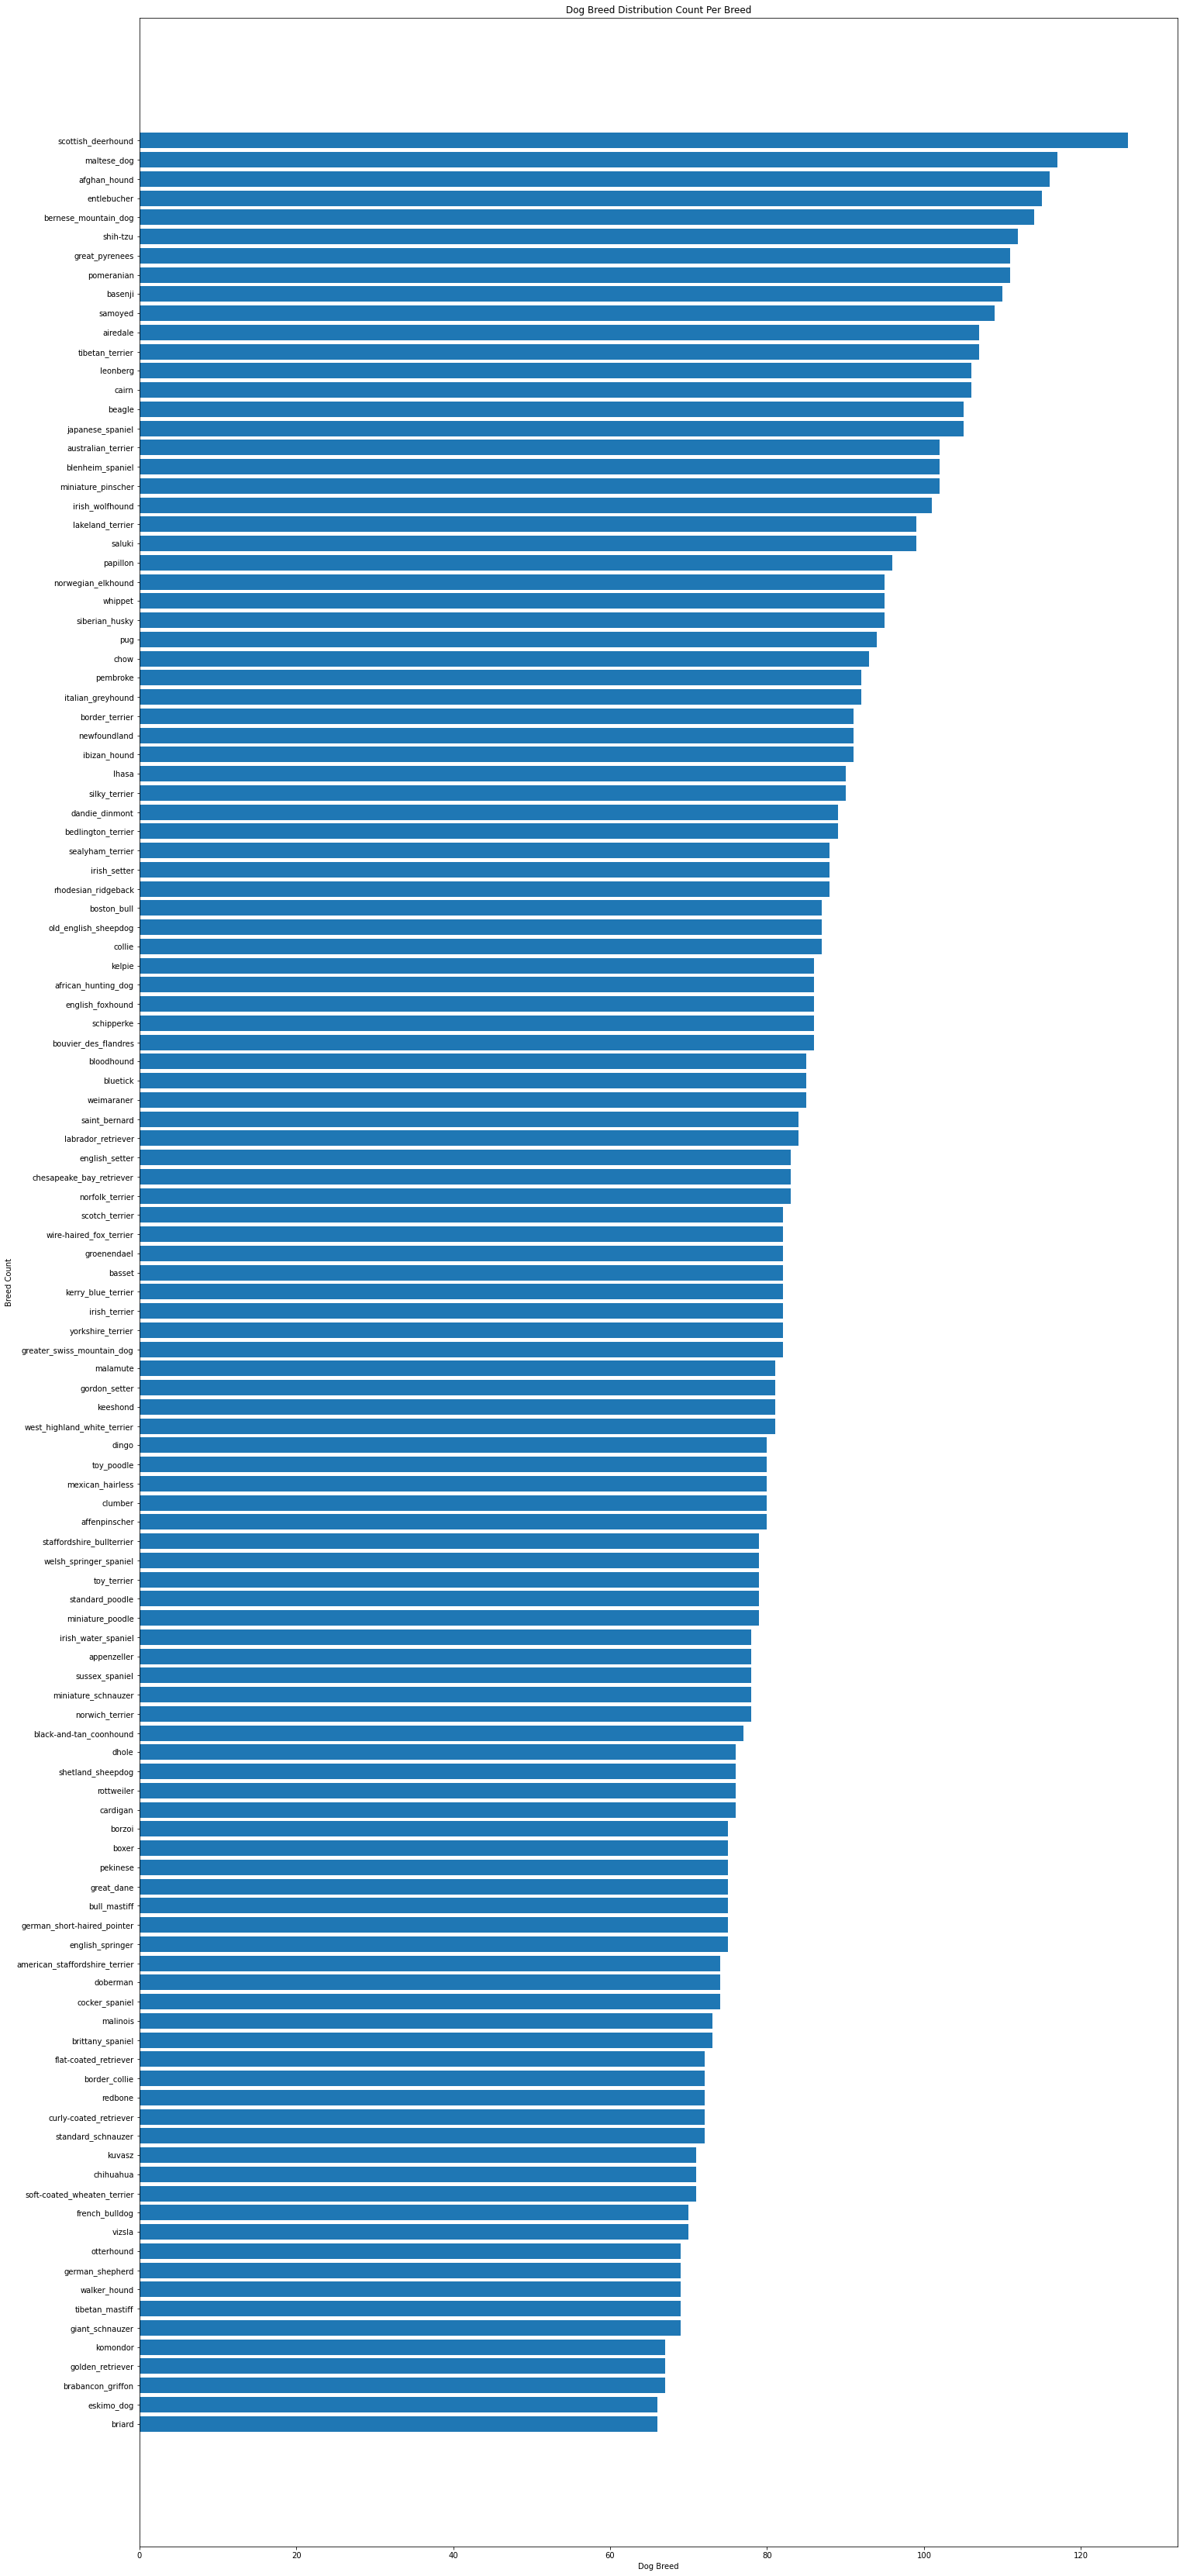

In [33]:
#Checking the label distribution per class
breed_categories_count = labels_df['breed'].value_counts().rename_axis('breed').reset_index(name='breedCount').sort_values('breedCount')
fig = plt.figure(figsize=(24,60))
plt.barh(breed_categories_count['breed'],breed_categories_count['breedCount'])
plt.xlabel("Dog Breed")
plt.ylabel("Breed Count")
plt.title("Dog Breed Distribution Count Per Breed")
plt.show()

* Form above our data classes seem to be balanced
* Because we have 120 classes, lets use a sample number of classes due to computational power

In [48]:
# Selecting first 3 breeds

CLASS_NAMES = list(breed_categories_count['breed'].tail(3))
labels =  labels_df[labels_df['breed'].isin(CLASS_NAMES)].reset_index()
labels.head()


,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,146,0379145880ad3978f9b80f0dc2c03fba,afghan_hound


In [53]:
# Convert the image to an array so as we can perform mathematical operations to it
# For this project we shall only normalize the image pixes


def train_data_creator(path_to_images,image_labels,class_labels,label_column):
    # Creating an empty matrix for our features data points
    X_data = np.zeros((len(image_labels[label_column]), 224,224,3),dtype='float32')

    # Creating the target column and encoding our classes
    y_data = label_binarize(image_labels[label_column],classes=class_labels)
    image_to_array(X_data,path_to_images,image_labels)

    print(f"Feature matrixs shape is {X_data.shape}")
    print(f"Number of target labels is {y_data.shape}")
    return X_data,y_data

def image_to_array(X_data,path_to_images,image_labels):
    for i in range(len(image_labels)):
        img = image.load_img(f"{path_to_images}/{image_labels['id'][i]}.jpg", target_size=(224,224))
        img = image.img_to_array(img)
        x = np.expand_dims(img.copy(),axis=0)
        X_data[i] = x / 255.0
    print("finished creating our feature matrix")

X_data,y_data = train_data_creator(path_to_images='data/train',image_labels=labels,class_labels=CLASS_NAMES,label_column='breed')

finished creating our feature matrix
Feature matrixs shape is (359, 224, 224, 3)
Number of target labels is (359, 3)


## Building & Training the Model

In [56]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,kernel_size=(7,7),activation='relu',kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8,kernel_size=(5,5),activation='relu',kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer='l2'))
model.add(Dense(64,activation='relu',kernel_regularizer='l2'))
model.add(Dense(len(CLASS_NAMES),activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])

model.summary()

2021-12-19 04:46:37.461943: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-19 04:46:38.210142: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-19 04:46:38.461494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-19 04:46:38.462153: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-12-19 04:46:38.462235: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-19 04:46:38.912342: I tensorflow/stream_executor/platform/default/ds

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        25104     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 8)         3

In [57]:
def train_val_test_split(X,y, validation_percentage=0.1,test_percentage=0.2):
    x_train_val,x_test,y_train_val,y_test = train_test_split(X,y,test_size=validation_percentage)
    x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,test_size=test_percentage)
    return x_train,y_train,x_val,y_val,x_test,y_test

X_train,y_train,X_val,y_val,X_test,y_test = train_val_test_split(X_data,y_data)

## Training the model

In [59]:
epochs = 100
batch_size = 4

history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs,validation_data=(X_val,y_val))

Epoch 1/100
65/65 [==============================] - 7s 87ms/step - loss: 4.5858 - accuracy: 0.3256 - val_loss: 4.2800 - val_accuracy: 0.4000
Epoch 2/100
65/65 [==============================] - 1s 23ms/step - loss: 4.0201 - accuracy: 0.4380 - val_loss: 3.7659 - val_accuracy: 0.4769
Epoch 3/100
65/65 [==============================] - 1s 23ms/step - loss: 3.5503 - accuracy: 0.4031 - val_loss: 3.3569 - val_accuracy: 0.4154
Epoch 4/100
65/65 [==============================] - 1s 23ms/step - loss: 3.1700 - accuracy: 0.4535 - val_loss: 3.0467 - val_accuracy: 0.3692
Epoch 5/100
65/65 [==============================] - 2s 23ms/step - loss: 2.8423 - accuracy: 0.4612 - val_loss: 2.8303 - val_accuracy: 0.4154
Epoch 6/100
65/65 [==============================] - 1s 23ms/step - loss: 2.5734 - accuracy: 0.5116 - val_loss: 2.6002 - val_accuracy: 0.4769
Epoch 7/100
65/65 [==============================] - 1s 23ms/step - loss: 2.3875 - accuracy: 0.5465 - val_loss: 2.4499 - val_accuracy: 0.4308
Epoch 

## Evaluating Our Model

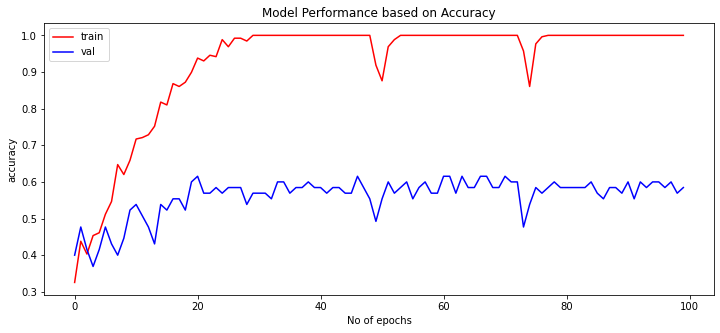

In [61]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')
plt.title('Model Performance based on Accuracy')
plt.ylabel('accuracy')
plt.xlabel('No of epochs')
plt.legend(['train','val'])
plt.show()

In [65]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test,y_test)
print(f'Accuracy on test data is {round(score[1]*100,2)} %')

2/2 [==============================] - 0s 10ms/step - loss: 1.4151 - accuracy: 0.6667
Accuracy on test data is 66.67%


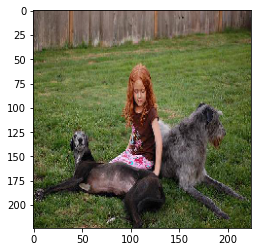

Original label was scottish_deerhound
Predicted label is scottish_deerhound


In [74]:
# Sample image prediction
def sample_image_prediction(img_index):
    plt.imshow(X_test[img_index,:,:,:])
    plt.show()

    print(f"Original label was {labels['breed'][np.argmax(y_test[img_index])]}")
    print(f"Predicted label is {labels['breed'][np.argmax(y_pred[img_index])]}")

sample_image_prediction(20)